# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

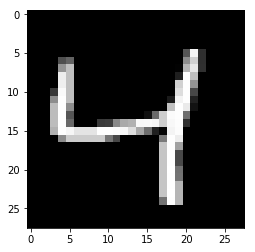

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [8]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(dtype=tf.float32, shape=(None, image_size), name='input')
targets_ = tf.placeholder(dtype=tf.float32, shape=(None, image_size), name='target')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs=encoded, units=image_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [9]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6955
Epoch: 1/20... Training loss: 0.6920
Epoch: 1/20... Training loss: 0.6888
Epoch: 1/20... Training loss: 0.6849
Epoch: 1/20... Training loss: 0.6802
Epoch: 1/20... Training loss: 0.6751
Epoch: 1/20... Training loss: 0.6687
Epoch: 1/20... Training loss: 0.6606
Epoch: 1/20... Training loss: 0.6513
Epoch: 1/20... Training loss: 0.6422
Epoch: 1/20... Training loss: 0.6290
Epoch: 1/20... Training loss: 0.6160
Epoch: 1/20... Training loss: 0.6024
Epoch: 1/20... Training loss: 0.5855
Epoch: 1/20... Training loss: 0.5707
Epoch: 1/20... Training loss: 0.5513
Epoch: 1/20... Training loss: 0.5340
Epoch: 1/20... Training loss: 0.5170
Epoch: 1/20... Training loss: 0.4980
Epoch: 1/20... Training loss: 0.4792
Epoch: 1/20... Training loss: 0.4636
Epoch: 1/20... Training loss: 0.4478
Epoch: 1/20... Training loss: 0.4286
Epoch: 1/20... Training loss: 0.4160
Epoch: 1/20... Training loss: 0.3996
Epoch: 1/20... Training loss: 0.3869
Epoch: 1/20... Training loss: 0.3801
E

Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1959
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1794
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1807
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1925
E

Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1534
E

Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1341
E

Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1203
E

Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1187
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1144
E

Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1032
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1049
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1044
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1081
E

Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.0987
Epoch: 6/20... Training loss: 0.1034
E

Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1014
E

Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0960
E

Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0959
E

Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.1016
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0

Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0889
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0872
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0881
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0889
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0988
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.1004
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0979
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

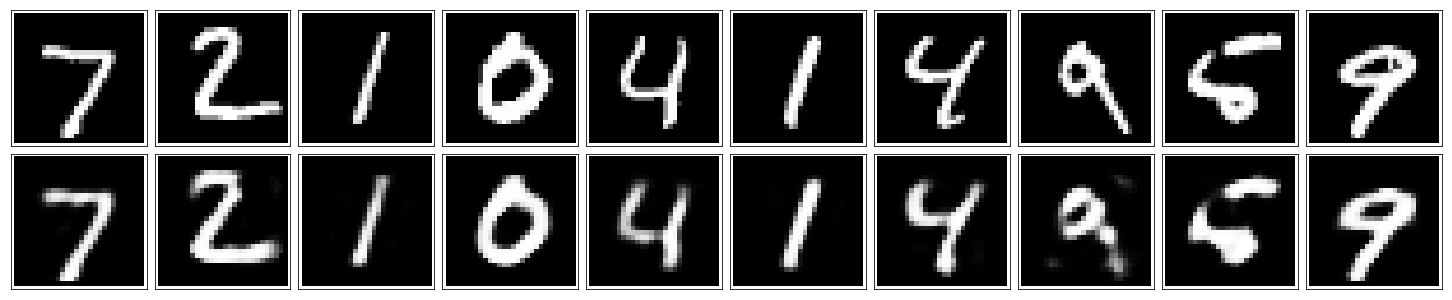

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.